# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [1]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

#### Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)

In [2]:
# filter out irrelevant columns
df = df.drop('WaterworksName', axis=1)

#### Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?


In [3]:
# check for missing values
missing_percentage = df.isnull().sum() / len(df) * 100

print(round(missing_percentage, 2))

TotalFilters                  0.00
MaxTypicalFlow               20.25
AverageFilterArea             5.06
AverageTypicalRunVolume       2.53
AverageBackwashVolume        12.66
PrimaryTrigger                0.00
AverageTotalFilterDepth      41.77
OverallFilterGrainSizeMin    43.04
OverallFilterGrainSizeMax    43.04
AverageFilterBedVolume       43.04
FilterExploitation           20.25
AerationType                  0.00
OxygenFactor                  0.00
Stage1HLR                    26.58
TotalEBCT                    49.37
Footprint                     5.06
SumOfld_layer                49.37
UniformityCoefficient        64.56
UFRV                          8.86
BW%                          16.46
HLR_BW                       34.18
TankCapacity                  5.06
TankExploitation             37.97
GravityPressureMixed          0.00
Stages                        0.00
AbstractedVolume              0.00
dtype: float64


In [4]:
columns_to_drop = missing_percentage[missing_percentage > 40].index

# drop columns with more than 40% missing values
df = df.drop(columns_to_drop, axis=1)

#### Scale numeric data.

In [5]:
from sklearn import preprocessing
import numpy as np

# select numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# scale numerical columns
std_scaler = preprocessing.StandardScaler()
scaled_num_cols = std_scaler.fit_transform(df[num_cols])

scaled_num_df = pd.DataFrame(scaled_num_cols, columns=num_cols, index=df.index)
df_non_numeric = df.drop(columns=num_cols)

# combine non-numeric and scaled numeric columns
df = pd.concat([df_non_numeric, scaled_num_df], axis=1)

display(df.head())

,PrimaryTrigger,AerationType,GravityPressureMixed,Stages,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,AbstractedVolume
0,Time,Cascade,Gravity,Single,-0.062970,-0.615572,-0.658687,0.013068,-0.827796,-0.105711,-0.095208,-0.910784,0.885898,2.721340,-0.465674,NaN,0.634165,NaN,-0.458419
1,Volume,Air injection,Pressure,Double,-0.560431,-0.396440,-0.784768,-0.540142,-0.321756,0.134672,-1.127717,1.429302,-0.820640,-1.331469,3.667836,-0.095835,-1.107257,NaN,-0.263853
2,Volume,Bottom aeration,Gravity,Double,-0.560431,-0.359918,0.420872,-0.144992,1.232912,0.193835,1.228522,-0.303775,-0.443564,-0.308485,-0.140352,0.098640,0.248864,NaN,-0.225746
3,Volume,Cascade,Gravity,Single,-1.057891,NaN,0.496675,-0.438532,-0.377982,NaN,0.672555,NaN,1.576548,-1.163373,-0.144961,NaN,-0.404295,NaN,-0.510808
4,Volume,Cascade,Gravity,Single,-1.057891,NaN,-1.179178,-0.545787,-0.982419,NaN,-2.345548,NaN,4.510634,-0.710829,-0.208783,NaN,2.390177,NaN,-0.592361


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PrimaryTrigger           79 non-null     object 
 1   AerationType             79 non-null     object 
 2   GravityPressureMixed     79 non-null     object 
 3   Stages                   79 non-null     object 
 4   TotalFilters             79 non-null     float64
 5   MaxTypicalFlow           63 non-null     float64
 6   AverageFilterArea        75 non-null     float64
 7   AverageTypicalRunVolume  77 non-null     float64
 8   AverageBackwashVolume    69 non-null     float64
 9   FilterExploitation       63 non-null     float64
 10  OxygenFactor             79 non-null     float64
 11  Stage1HLR                58 non-null     float64
 12  Footprint                75 non-null     float64
 13  UFRV                     72 non-null     float64
 14  BW%                      66 

#### Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?

In [7]:
object_cols = ['PrimaryTrigger', 'AerationType', 'GravityPressureMixed']

# one-hot encode object columns
df = pd.get_dummies(df, columns=object_cols)

In [8]:
# The "Stages" column appears to have an inherent order ("Single" < "Double" < "Triple", etc.). 
# One-hot encoding treats each category as a separate feature without considering any potential order or hierarchy among them. 
# This could lead to the loss of valuable ordinal information that might be relevant to your analysis or predictive modeling.

from sklearn.preprocessing import OrdinalEncoder

# create an instance of OrdinalEncoder  
ordinal_encoder = OrdinalEncoder()

# fit the encoder to the "Stages" column
ordinal_encoder.fit(df[['Stages']])

# transform the "Stages" column
stages_encoded = ordinal_encoder.transform(df[['Stages']])

# replace the original "Stages" column with the encoded version
df['Stages'] = stages_encoded

display(df.head())

,Stages,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,...,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Gravity,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,2.0,-0.062970,-0.615572,-0.658687,0.013068,-0.827796,-0.105711,-0.095208,-0.910784,0.885898,...,False,True,False,False,False,False,False,True,False,False
1,0.0,-0.560431,-0.396440,-0.784768,-0.540142,-0.321756,0.134672,-1.127717,1.429302,-0.820640,...,False,False,False,False,False,False,False,False,False,True
2,0.0,-0.560431,-0.359918,0.420872,-0.144992,1.232912,0.193835,1.228522,-0.303775,-0.443564,...,True,False,False,False,False,False,False,True,False,False
3,2.0,-1.057891,NaN,0.496675,-0.438532,-0.377982,NaN,0.672555,NaN,1.576548,...,False,True,False,False,False,False,False,True,False,False
4,2.0,-1.057891,NaN,-1.179178,-0.545787,-0.982419,NaN,-2.345548,NaN,4.510634,...,False,True,False,False,False,False,False,True,False,False


#### For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?


<Axes: >

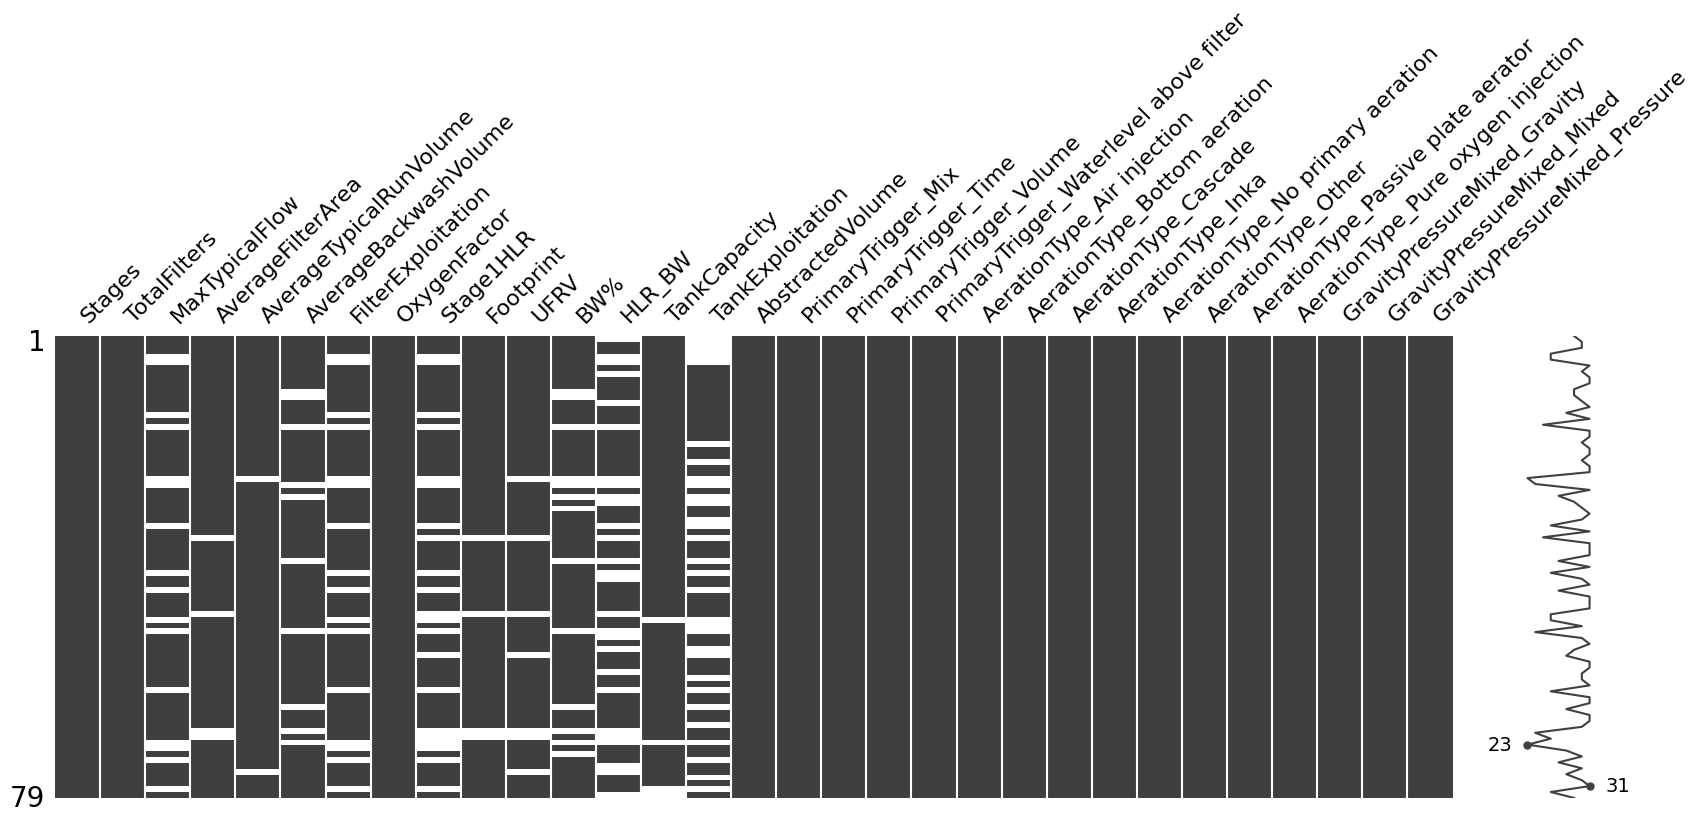

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
%matplotlib inline

# visualize the distribution of the missing values
df.isnull().sum()
mno.matrix(df, figsize = (20, 6))

In [10]:
# using random imputation to fill in missing values

# list of columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()

def random_imputation(df, feature):
    # number of missing values
    number_missing = df[feature].isnull().sum()
    # list of observed values
    observed_values = df.loc[df[feature].notnull(), feature]
    # Impute missing values in 'feature' with random existing values and store in a new column '[feature]_imp'
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    return df

for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

display(df.head())

,Stages,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,...,AverageTypicalRunVolume_imp,AverageBackwashVolume_imp,FilterExploitation_imp,Stage1HLR_imp,Footprint_imp,UFRV_imp,BW%_imp,HLR_BW_imp,TankCapacity_imp,TankExploitation_imp
0,2.0,-0.062970,-0.615572,-0.658687,0.013068,-0.827796,-0.105711,-0.095208,-0.910784,0.885898,...,0.013068,-0.827796,-0.105711,-0.910784,0.885898,2.721340,-0.465674,0.028598,0.634165,-0.972621
1,0.0,-0.560431,-0.396440,-0.784768,-0.540142,-0.321756,0.134672,-1.127717,1.429302,-0.820640,...,-0.540142,-0.321756,0.134672,1.429302,-0.820640,-1.331469,3.667836,-0.095835,-1.107257,-1.026993
2,0.0,-0.560431,-0.359918,0.420872,-0.144992,1.232912,0.193835,1.228522,-0.303775,-0.443564,...,-0.144992,1.232912,0.193835,-0.303775,-0.443564,-0.308485,-0.140352,0.098640,0.248864,1.515493
3,2.0,-1.057891,NaN,0.496675,-0.438532,-0.377982,NaN,0.672555,NaN,1.576548,...,-0.438532,-0.377982,-1.061009,-0.804270,1.576548,-1.163373,-0.144961,1.300489,-0.404295,-0.675384
4,2.0,-1.057891,NaN,-1.179178,-0.545787,-0.982419,NaN,-2.345548,NaN,4.510634,...,-0.545787,-0.982419,1.416634,-0.591707,4.510634,-0.710829,-0.208783,-0.560029,2.390177,-0.751582


<Axes: >

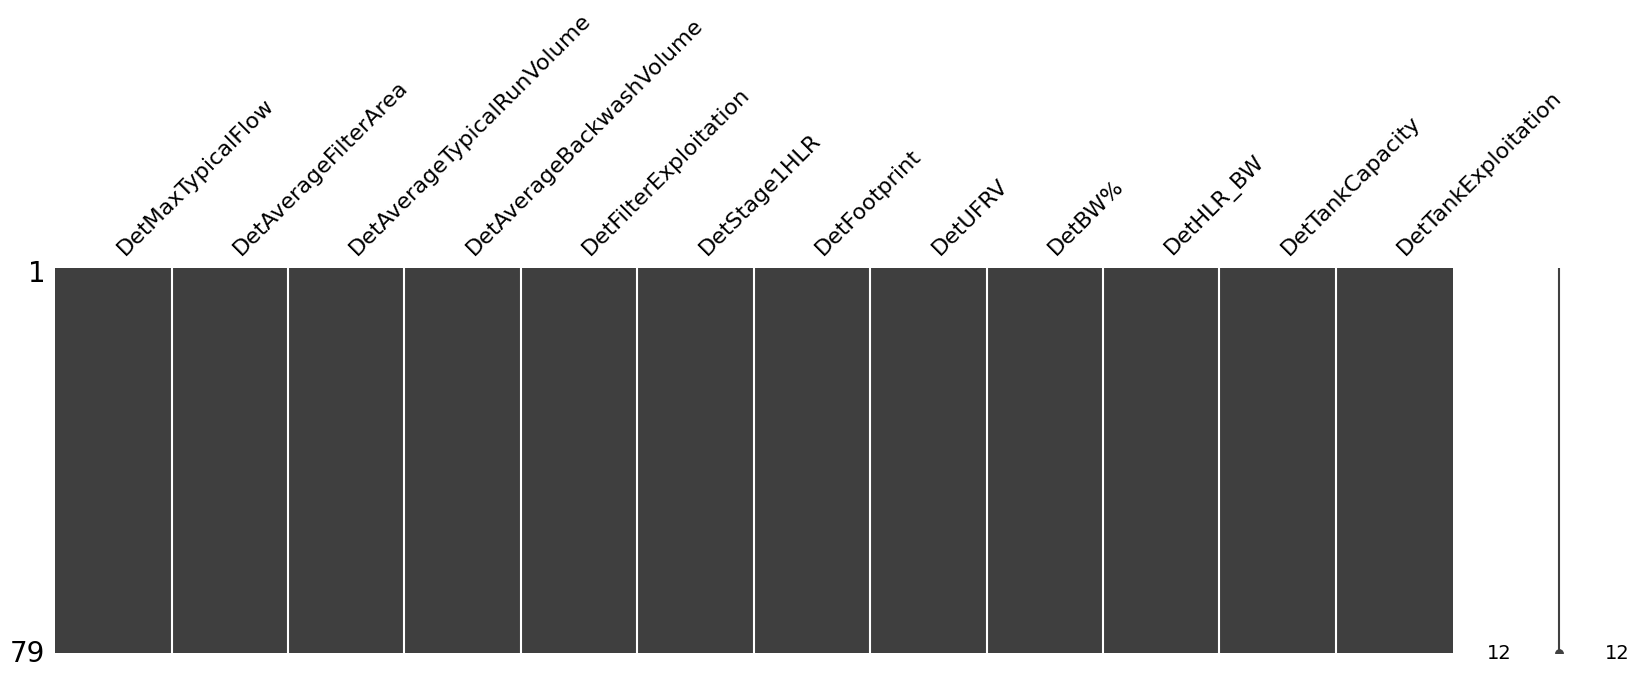

In [11]:
# Deterministic Regression Imputation 
# we replace the missing data with the values predicted in our regression model and repeat this process for each variable.

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

mno.matrix(deter_data, figsize = (20,5))

In [12]:
# To add uncertainity back to the imputed variable values, 
# we can add some normally distributed noise with a mean of zero and the variance equal to the standard error of regression estimates . 
# This method is called as Random Imputation or Stochastic Regression Imputation

random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])

for feature in missing_columns:
        
    random_data["Ran" + feature] = df[feature + '_imp']
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(df[parameters])
    std_error = (predict[df[feature].notnull()] - df.loc[df[feature].notnull(), feature + '_imp']).std()
    
    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = df[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(df[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(df[feature].isnull()) & 
                                                                            (random_predict > 0)]

display(random_data.head())

,RanMaxTypicalFlow,RanAverageFilterArea,RanAverageTypicalRunVolume,RanAverageBackwashVolume,RanFilterExploitation,RanStage1HLR,RanFootprint,RanUFRV,RanBW%,RanHLR_BW,RanTankCapacity,RanTankExploitation
0,-0.615572,-0.658687,0.013068,-0.827796,-0.105711,-0.910784,0.885898,2.721340,-0.465674,0.407409,0.634165,-0.972621
1,-0.396440,-0.784768,-0.540142,-0.321756,0.134672,1.429302,-0.820640,-1.331469,3.667836,-0.095835,-1.107257,-1.026993
2,-0.359918,0.420872,-0.144992,1.232912,0.193835,-0.303775,-0.443564,-0.308485,-0.140352,0.098640,0.248864,1.515493
3,1.015852,0.496675,-0.438532,-0.377982,0.581883,-0.804270,1.576548,-1.163373,-0.144961,0.231891,-0.404295,0.804374
4,0.579431,-1.179178,-0.545787,-0.982419,1.416634,-0.591707,4.510634,-0.710829,-0.208783,-0.560029,2.390177,-0.751582


In [13]:
for feature in missing_columns:
    # Construct the name of the imputed column in `random_data`
    imputed_column_name = "Ran" + feature
    
    # Check if the imputed column exists in `random_data`
    if imputed_column_name in random_data.columns:
        # Replace the original column in `df` with the imputed column from `random_data`
        df[feature] = random_data[imputed_column_name]

display(df.head())

# drop the _imp columns
df = df.drop(columns=[col for col in df.columns if '_imp' in col])

display(df)

,Stages,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,...,AverageTypicalRunVolume_imp,AverageBackwashVolume_imp,FilterExploitation_imp,Stage1HLR_imp,Footprint_imp,UFRV_imp,BW%_imp,HLR_BW_imp,TankCapacity_imp,TankExploitation_imp
0,2.0,-0.062970,-0.615572,-0.658687,0.013068,-0.827796,-0.105711,-0.095208,-0.910784,0.885898,...,0.013068,-0.827796,-0.105711,-0.910784,0.885898,2.721340,-0.465674,0.028598,0.634165,-0.972621
1,0.0,-0.560431,-0.396440,-0.784768,-0.540142,-0.321756,0.134672,-1.127717,1.429302,-0.820640,...,-0.540142,-0.321756,0.134672,1.429302,-0.820640,-1.331469,3.667836,-0.095835,-1.107257,-1.026993
2,0.0,-0.560431,-0.359918,0.420872,-0.144992,1.232912,0.193835,1.228522,-0.303775,-0.443564,...,-0.144992,1.232912,0.193835,-0.303775,-0.443564,-0.308485,-0.140352,0.098640,0.248864,1.515493
3,2.0,-1.057891,1.015852,0.496675,-0.438532,-0.377982,0.581883,0.672555,-0.804270,1.576548,...,-0.438532,-0.377982,-1.061009,-0.804270,1.576548,-1.163373,-0.144961,1.300489,-0.404295,-0.675384
4,2.0,-1.057891,0.579431,-1.179178,-0.545787,-0.982419,1.416634,-2.345548,-0.591707,4.510634,...,-0.545787,-0.982419,1.416634,-0.591707,4.510634,-0.710829,-0.208783,-0.560029,2.390177,-0.751582


,Stages,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,...,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Gravity,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,2.0,-0.062970,-0.615572,-0.658687,0.013068,-0.827796,-0.105711,-0.095208,-0.910784,0.885898,...,False,True,False,False,False,False,False,True,False,False
1,0.0,-0.560431,-0.396440,-0.784768,-0.540142,-0.321756,0.134672,-1.127717,1.429302,-0.820640,...,False,False,False,False,False,False,False,False,False,True
2,0.0,-0.560431,-0.359918,0.420872,-0.144992,1.232912,0.193835,1.228522,-0.303775,-0.443564,...,True,False,False,False,False,False,False,True,False,False
3,2.0,-1.057891,1.015852,0.496675,-0.438532,-0.377982,0.581883,0.672555,-0.804270,1.576548,...,False,True,False,False,False,False,False,True,False,False
4,2.0,-1.057891,0.579431,-1.179178,-0.545787,-0.982419,1.416634,-2.345548,-0.591707,4.510634,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.0,2.424334,4.409852,4.186904,0.329188,1.983538,1.336665,-1.418938,0.007969,-0.721016,...,False,True,False,False,False,False,False,True,False,False
75,2.0,3.419256,4.341519,-0.175889,-0.065962,0.493531,1.238848,0.910826,0.406159,-0.748722,...,False,False,False,False,False,True,False,False,False,True
76,2.0,-0.062970,0.114868,0.352544,-0.310785,0.340876,-1.750409,-0.915920,-0.568556,1.771806,...,True,False,False,False,False,False,False,True,False,False
77,0.0,1.429413,0.683232,2.973473,-0.077252,2.658258,0.578919,1.175572,1.523159,1.009519,...,False,True,False,False,False,False,False,True,False,False


#### If you you choose to remove or replace outliers, do this now

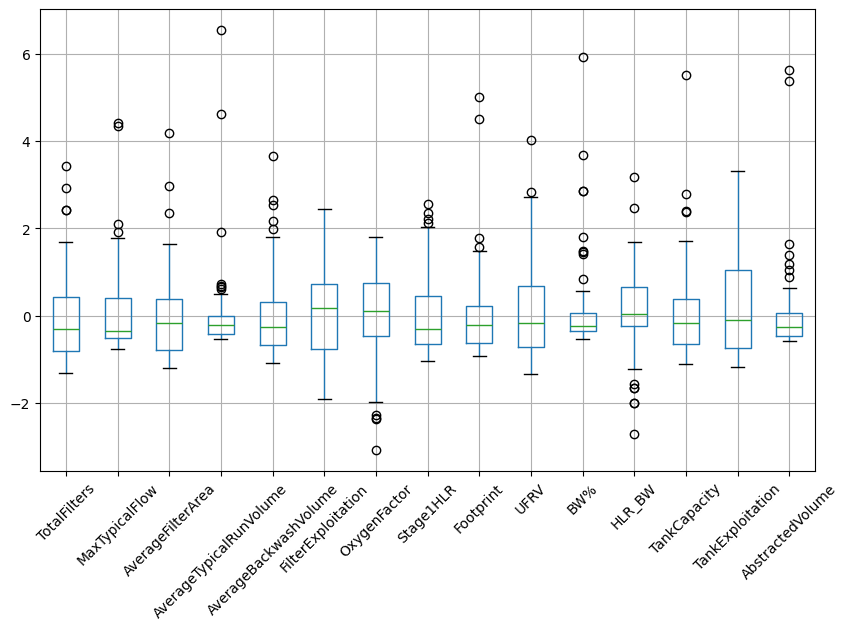

79


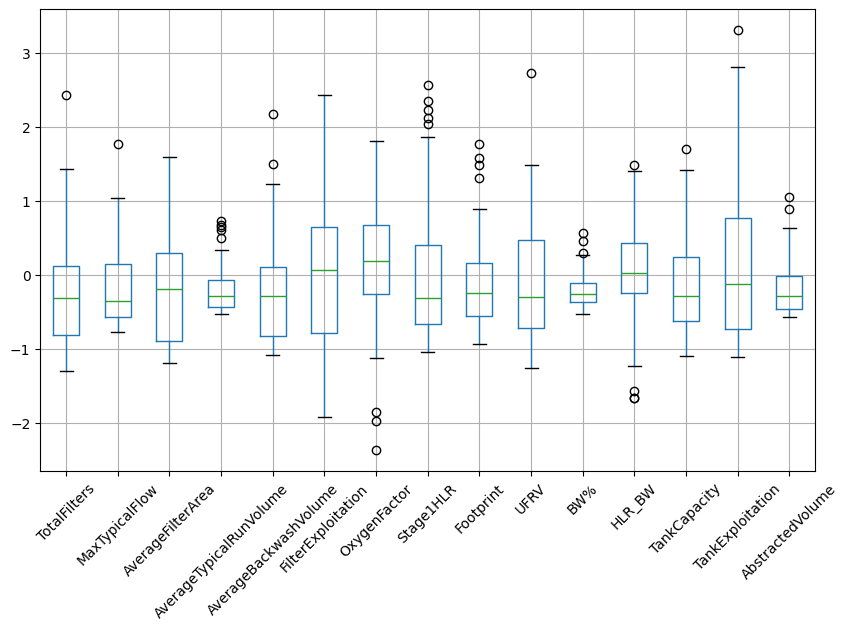

54


In [14]:
plt.figure(figsize=(10, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.show()

print(df.shape[0])

# filter out outliers

for feature in num_cols:
    ## Calculate Q1, Q3, and IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for what is an outlier
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    
    # Filter out outliers in the feature column
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

plt.figure(figsize=(10, 6))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.show()

# Remove columns with no different values
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col, axis=1, inplace=True)


print(df.shape[0])



#### Create a correlation matrix and discuss

,Stages,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,...,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Gravity,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
Stages,1.000000e+00,-0.146013,0.197708,-0.041826,-0.325279,-0.184394,-0.138405,0.097927,-0.085406,0.186401,...,0.203859,-0.226711,0.107502,0.107502,0.107502,-0.241191,0.027116,-0.030349,0.107502,-1.097135e-17
TotalFilters,-1.460129e-01,1.000000,0.540037,0.397515,0.182220,0.349476,0.216106,-0.151619,-0.316826,0.057520,...,0.284547,0.008866,0.276592,-0.150150,-0.107476,0.029336,-0.089303,0.383732,-0.107476,-3.579958e-01
MaxTypicalFlow,1.977084e-01,0.540037,1.000000,0.395248,0.196951,0.306541,-0.135193,0.023863,-0.127112,0.120612,...,0.180175,-0.011317,0.214910,-0.133359,-0.075658,0.160735,0.075337,0.223002,-0.060265,-2.086734e-01
AverageFilterArea,-4.182648e-02,0.397515,0.395248,1.000000,0.405138,0.798930,0.298744,-0.066024,-0.569383,0.313265,...,0.368042,0.103540,0.123916,-0.182482,0.080589,-0.076705,-0.185543,0.661681,-0.035515,-6.601470e-01
AverageTypicalRunVolume,-3.252785e-01,0.182220,0.196951,0.405138,1.000000,0.477678,0.232555,-0.179174,-0.112230,-0.000180,...,-0.075606,0.106348,0.023340,-0.137472,0.074613,0.231311,0.351217,0.097153,0.004466,-9.969671e-02
AverageBackwashVolume,-1.843936e-01,0.349476,0.306541,0.798930,0.477678,1.000000,0.196093,-0.082658,-0.341486,0.162873,...,0.431403,-0.078085,0.080237,-0.168055,0.021168,-0.027960,-0.078354,0.435778,0.021168,-4.475112e-01
FilterExploitation,-1.384048e-01,0.216106,-0.135193,0.298744,0.232555,0.196093,1.000000,-0.153170,-0.418563,-0.056167,...,0.174465,0.108749,-0.146432,-0.241419,0.244863,-0.314092,0.050644,0.360508,0.029472,-3.736345e-01
OxygenFactor,9.792663e-02,-0.151619,0.023863,-0.066024,-0.179174,-0.082658,-0.153170,1.000000,0.040294,-0.080909,...,-0.040597,0.019646,0.212145,0.079861,-0.011085,0.202553,-0.438058,0.034951,0.150137,-7.834390e-02
Stage1HLR,-8.540626e-02,-0.316826,-0.127112,-0.569383,-0.112230,-0.341486,-0.418563,0.040294,1.000000,-0.574729,...,-0.363046,-0.274358,-0.098530,0.052809,-0.100201,0.333178,0.189813,-0.704643,-0.028840,7.220738e-01
Footprint,1.864014e-01,0.057520,0.120612,0.313265,-0.000180,0.162873,-0.056167,-0.080909,-0.574729,1.000000,...,0.132111,0.116639,0.077539,0.057072,-0.061754,-0.060926,0.026730,0.369480,-0.091002,-3.482690e-01


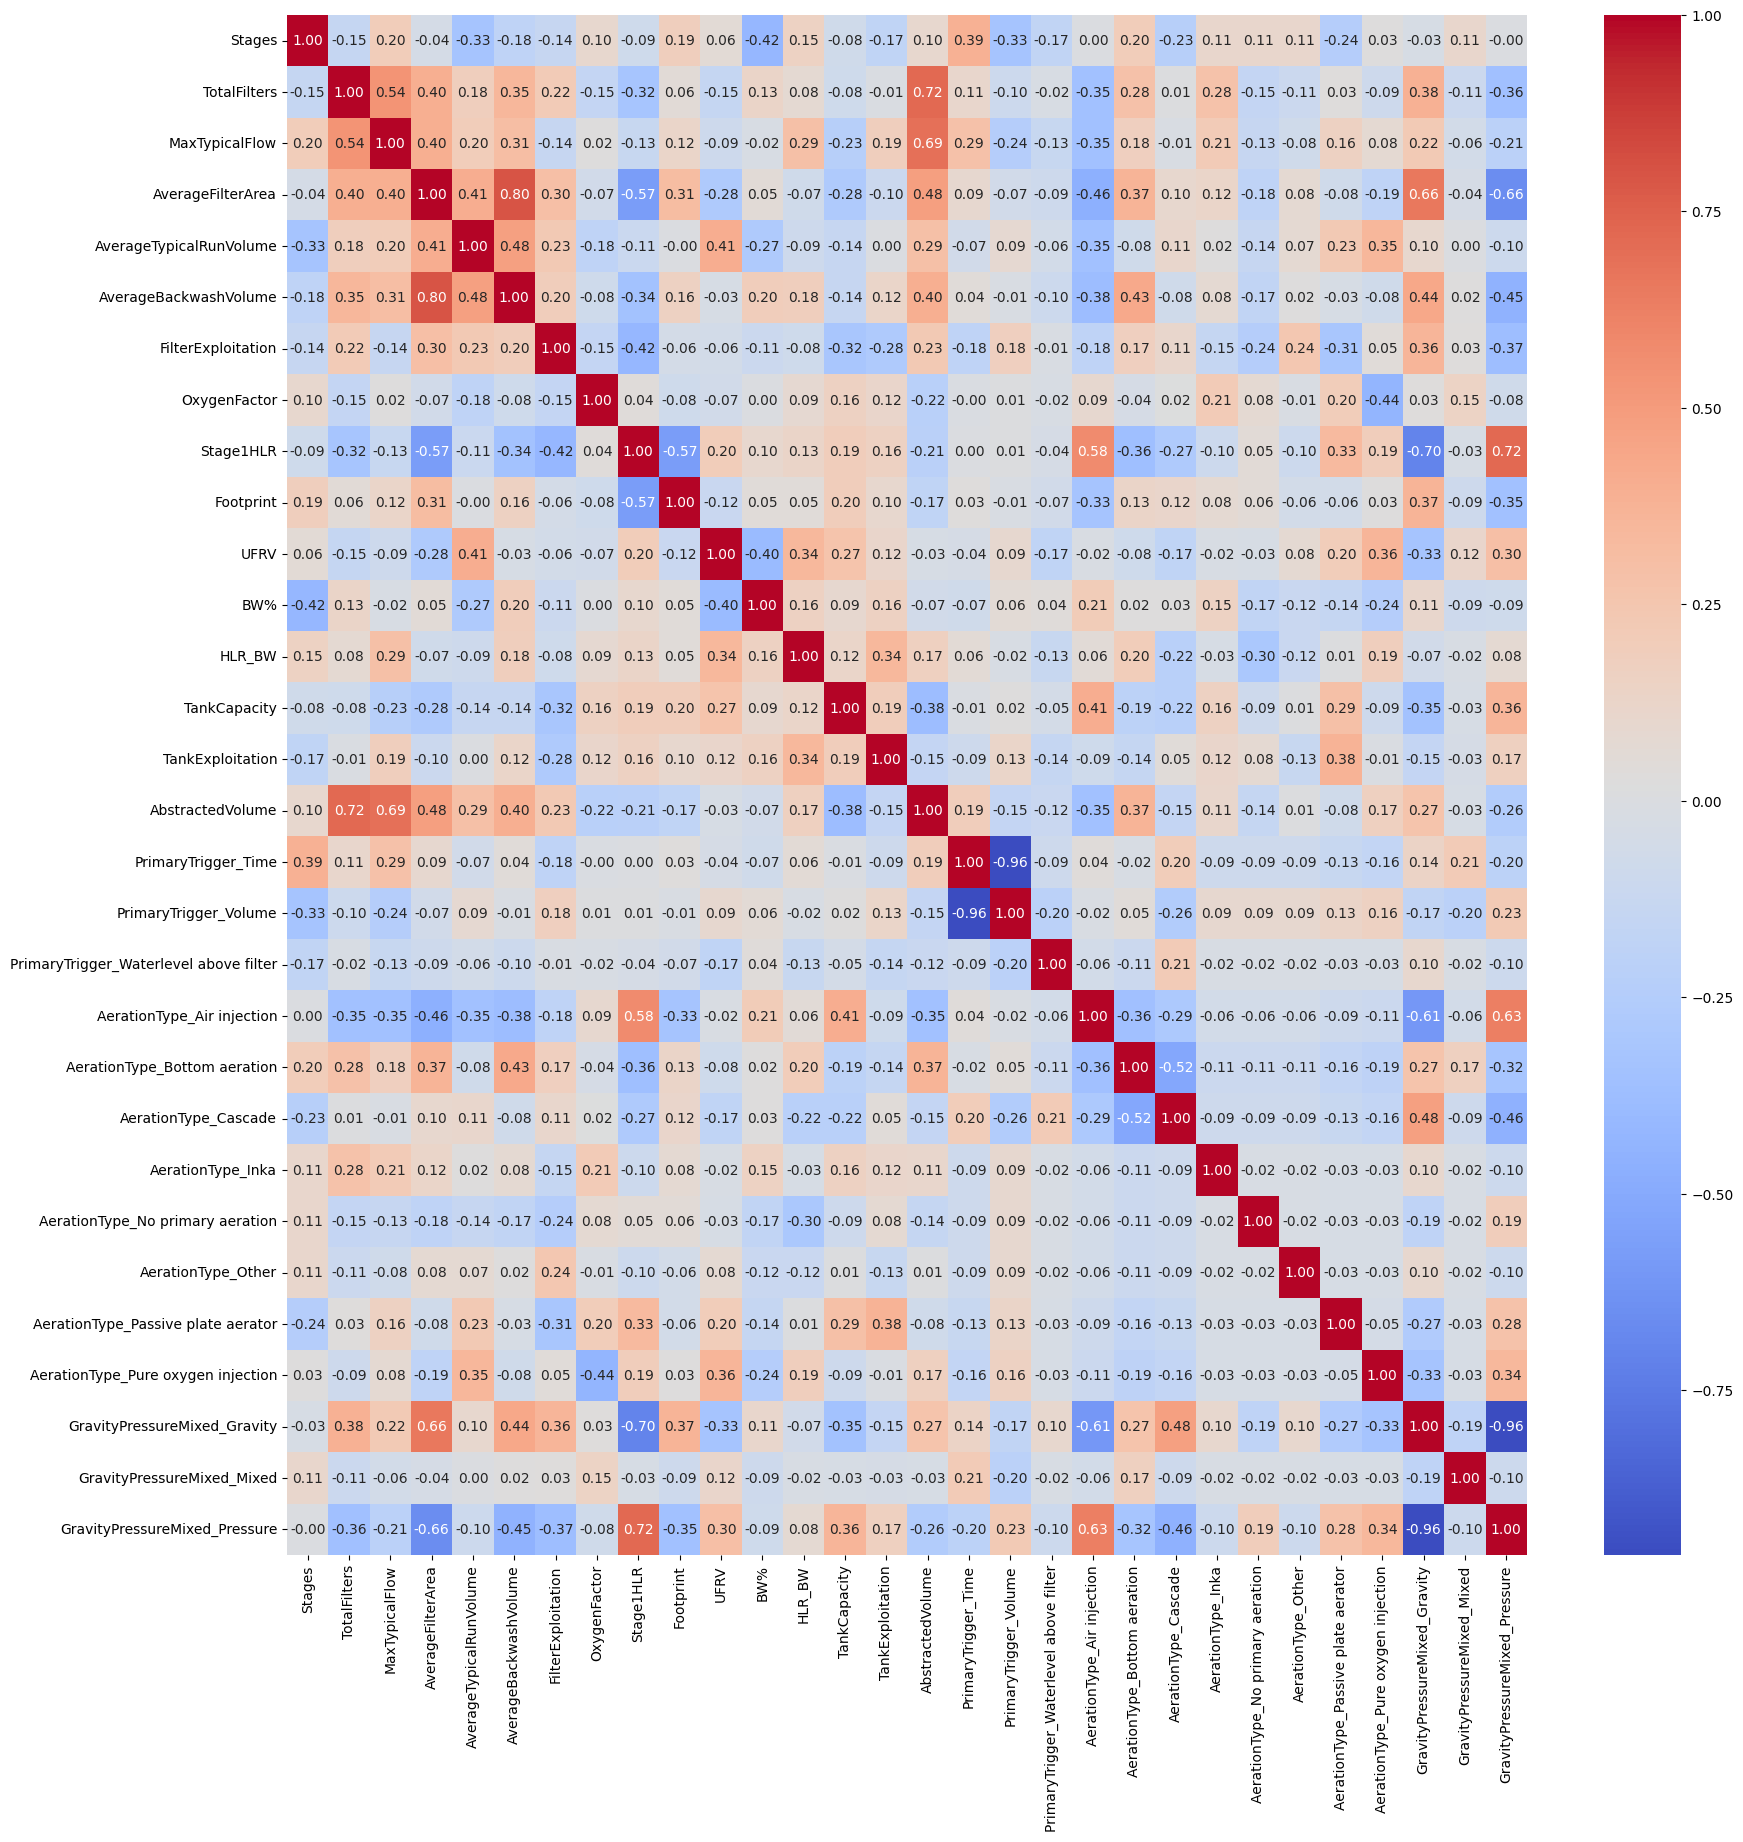

In [15]:
correlation_matrix = df.corr()

display(correlation_matrix)

# Using seaborn's heatmap function to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 78
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Stages                                  54 non-null     float64
 1   TotalFilters                            54 non-null     float64
 2   MaxTypicalFlow                          54 non-null     float64
 3   AverageFilterArea                       54 non-null     float64
 4   AverageTypicalRunVolume                 54 non-null     float64
 5   AverageBackwashVolume                   54 non-null     float64
 6   FilterExploitation                      54 non-null     float64
 7   OxygenFactor                            54 non-null     float64
 8   Stage1HLR                               54 non-null     float64
 9   Footprint                               54 non-null     float64
 10  UFRV                                    54 non-null     float64
 11  

{'GravityPressureMixed_Gravity', 'PrimaryTrigger_Volume'}

,Stages,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,...,AerationType_Air injection,AerationType_Bottom aeration,AerationType_Cascade,AerationType_Inka,AerationType_No primary aeration,AerationType_Other,AerationType_Passive plate aerator,AerationType_Pure oxygen injection,GravityPressureMixed_Mixed,GravityPressureMixed_Pressure
0,2.0,-0.062970,-0.615572,-0.658687,0.013068,-0.827796,-0.105711,-0.095208,-0.910784,0.885898,...,False,False,True,False,False,False,False,False,False,False
2,0.0,-0.560431,-0.359918,0.420872,-0.144992,1.232912,0.193835,1.228522,-0.303775,-0.443564,...,False,True,False,False,False,False,False,False,False,False
3,2.0,-1.057891,1.015852,0.496675,-0.438532,-0.377982,0.581883,0.672555,-0.804270,1.576548,...,False,False,True,False,False,False,False,False,False,False
5,0.0,1.429413,-0.012959,0.300264,-0.254129,-0.265529,0.419095,-0.465852,-0.793851,0.120386,...,False,False,True,False,False,False,False,False,False,False
6,0.0,-0.311700,-0.611920,-0.889760,-0.475789,-0.813739,-0.845360,-1.974904,1.797754,-0.773224,...,False,False,True,False,False,False,False,False,False,False
7,1.0,0.185761,-0.388515,-0.588210,-0.196603,-0.462322,0.732994,0.143063,-0.230486,-0.495726,...,False,True,False,False,False,False,False,False,False,True
10,0.0,-0.062970,-0.159047,0.041463,0.046938,0.665341,-0.053788,0.487233,-0.092588,-0.505957,...,False,True,False,False,False,False,False,False,False,False
11,2.0,-0.560431,-0.250644,-0.109890,-0.307003,-0.237416,-0.958407,-0.121683,-0.359828,-0.017056,...,False,False,True,False,False,False,False,False,False,False
12,2.0,-0.809161,-0.396440,-0.422707,-0.179417,-0.153076,0.173718,1.096149,-0.154985,-0.526342,...,False,True,False,False,False,False,False,False,True,False
13,2.0,-0.809161,0.120447,-0.196542,-0.259247,-0.321756,-0.398338,0.778454,-0.721385,0.329821,...,False,True,False,False,False,False,False,False,False,False


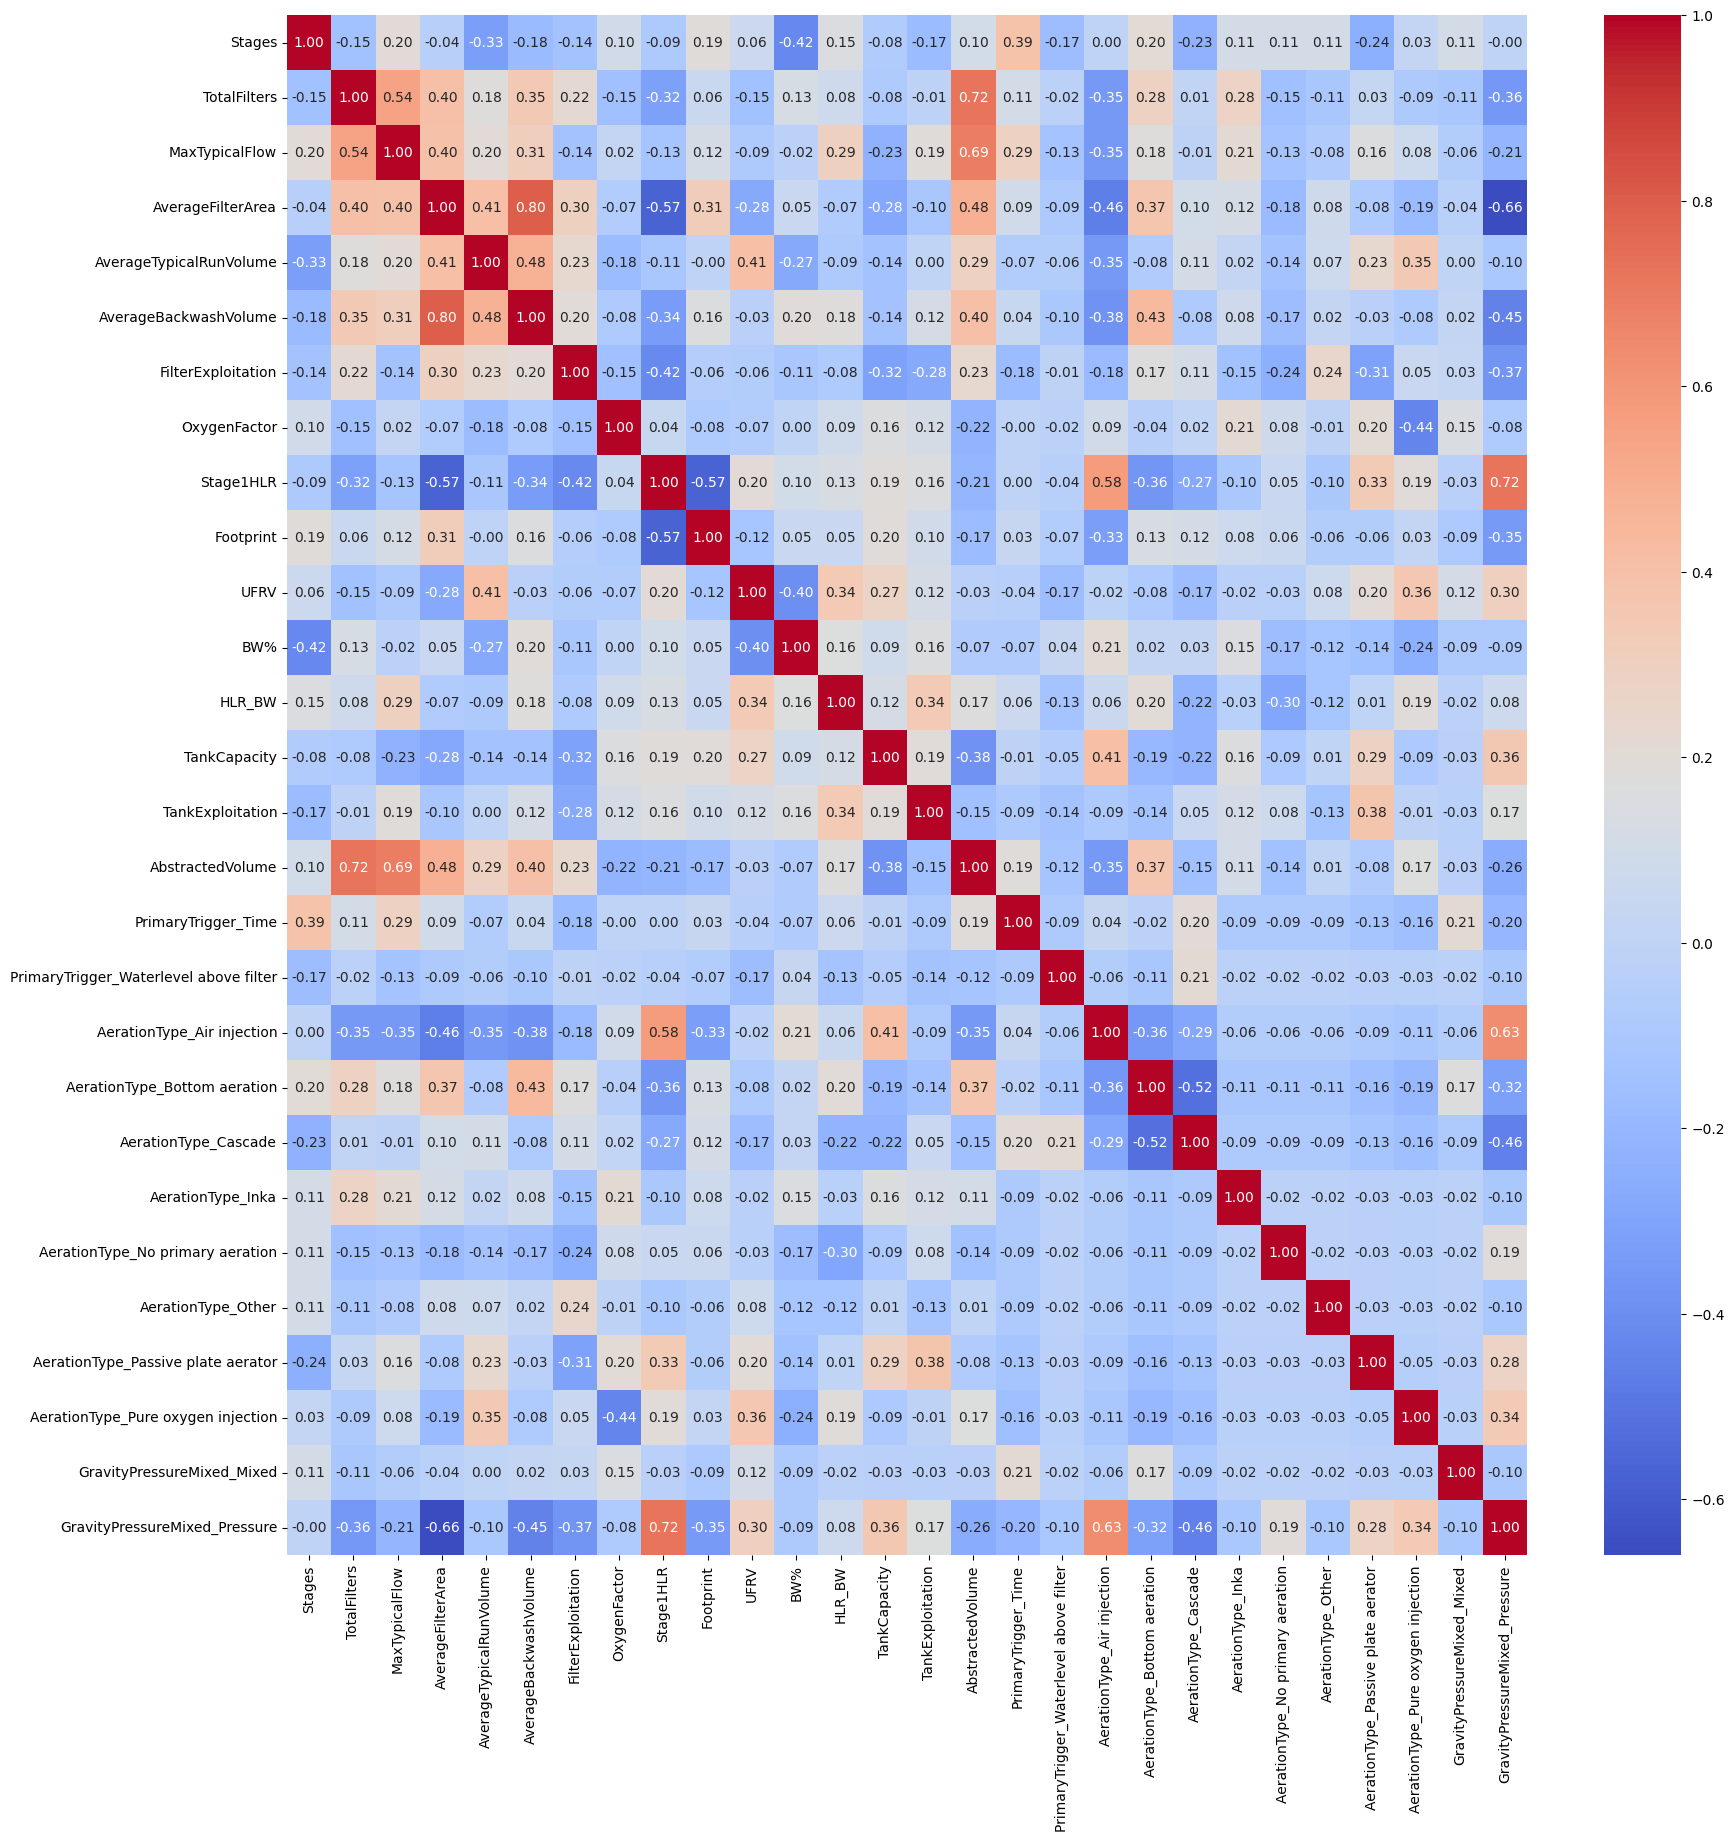

In [17]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                col1 = corr_matrix.columns[i] 
                col2 = corr_matrix.columns[j] 
                col1_sum = dataset[col1].abs().sum()
                col2_sum = dataset[col2].abs().sum()

                if col1_sum > col2_sum:
                    colname = corr_matrix.columns[i]
                else:
                    colname = corr_matrix.columns[j]

                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset, col_corr

df, col_corr = correlation(df, 0.8)

display(col_corr)
display(df)

correlation_matrix2 = df.corr()

# Using seaborn's heatmap function to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

#### Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.

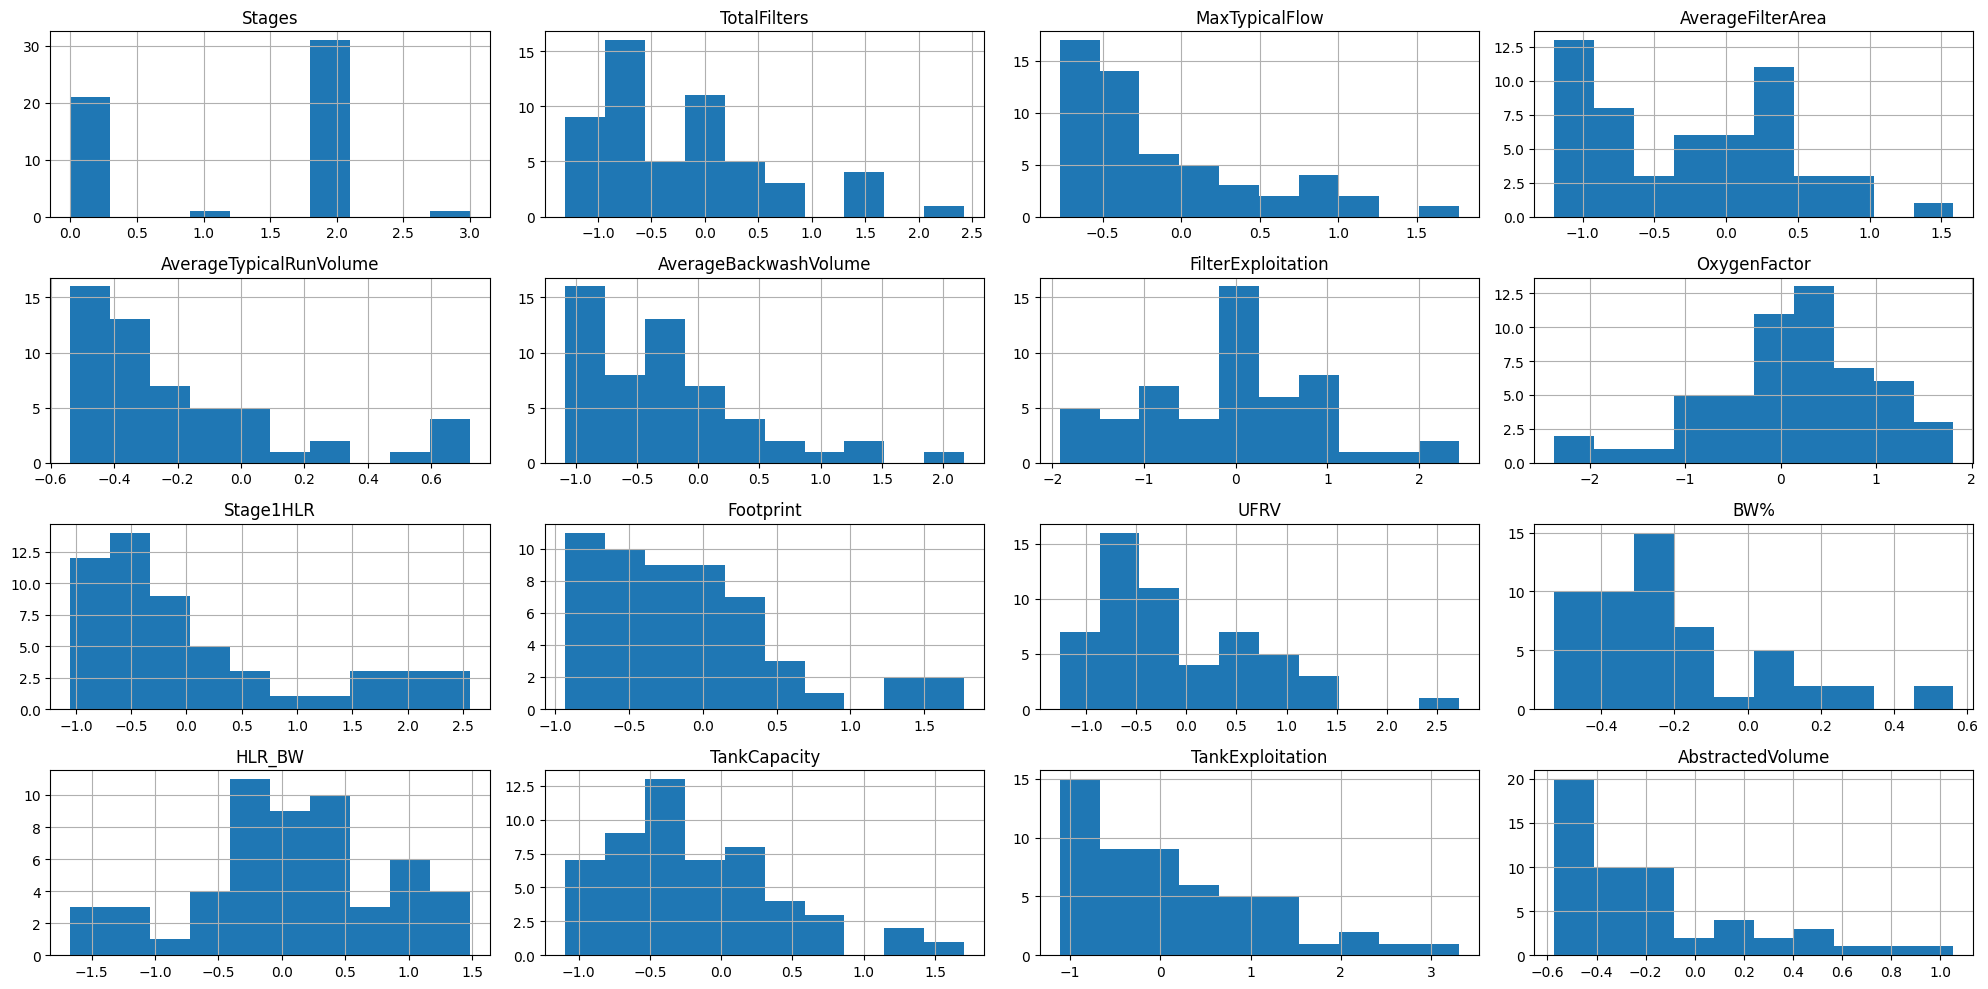

In [18]:
# Visualise feature to inspect if transformation is needed

df.hist(figsize=(20, 10))
plt.tight_layout()
plt.show()

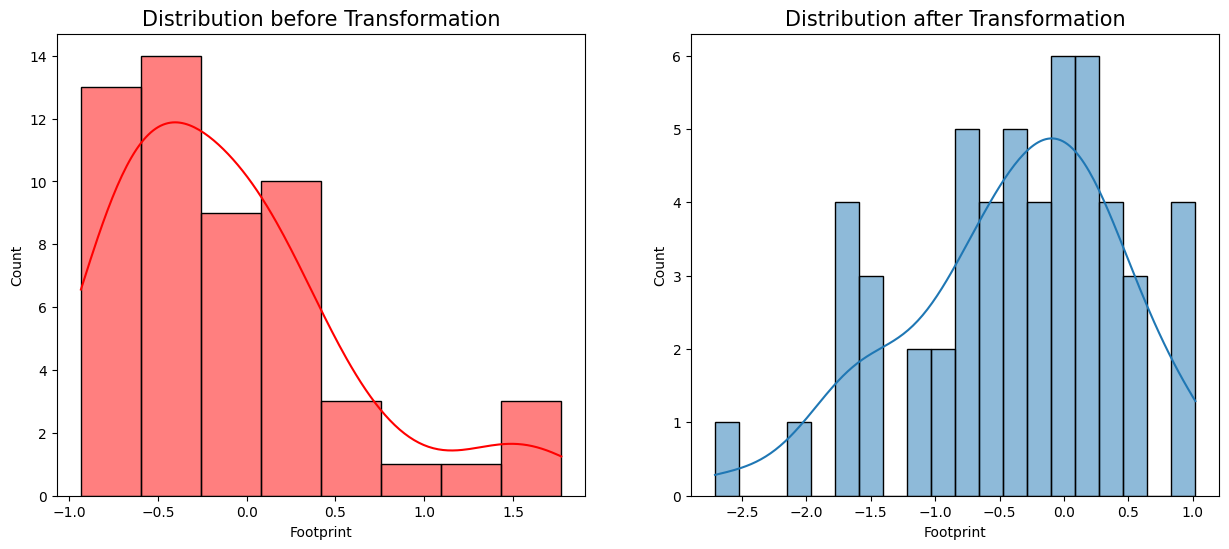

c:\Users\agata\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


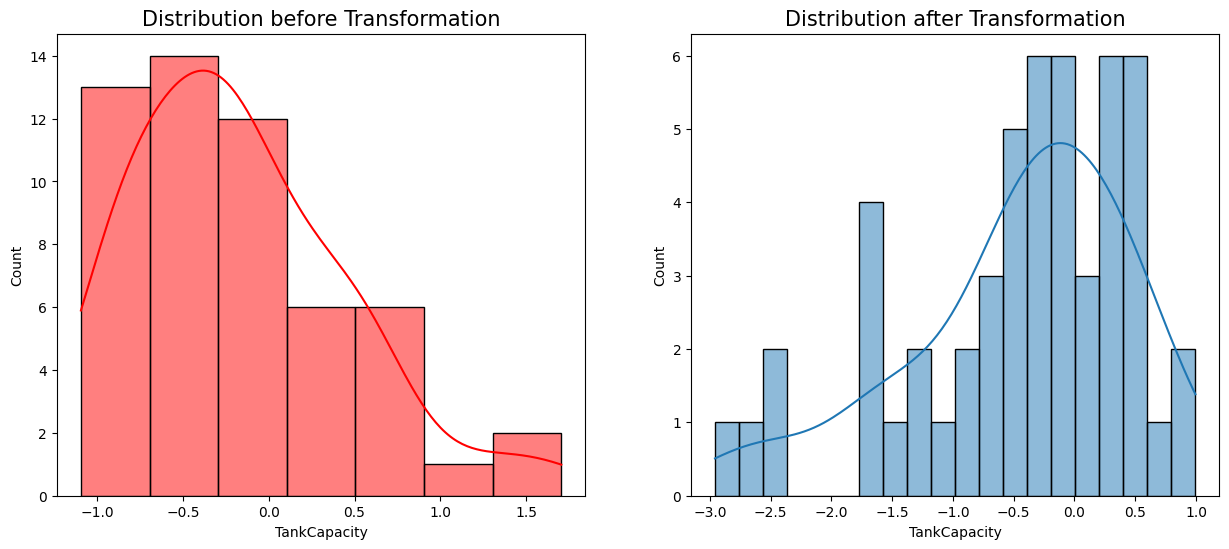

c:\Users\agata\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


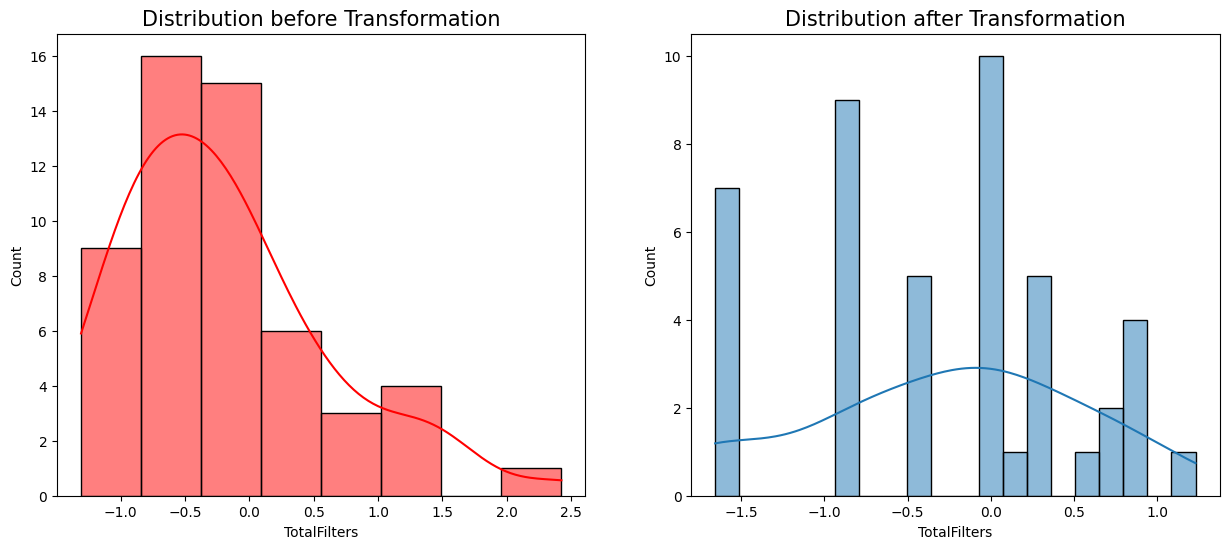

c:\Users\agata\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


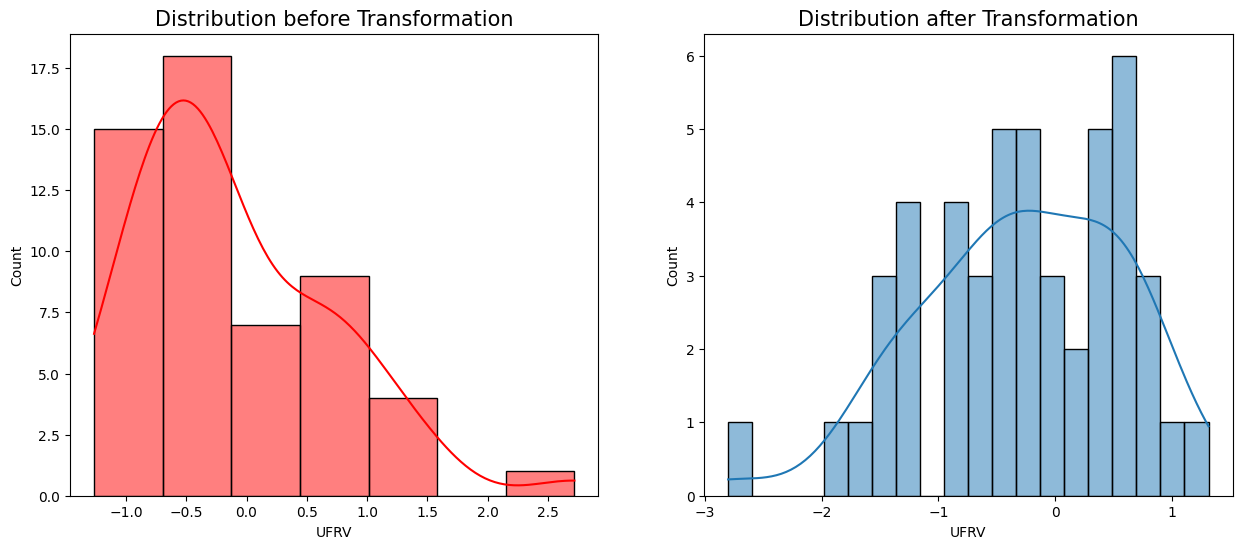

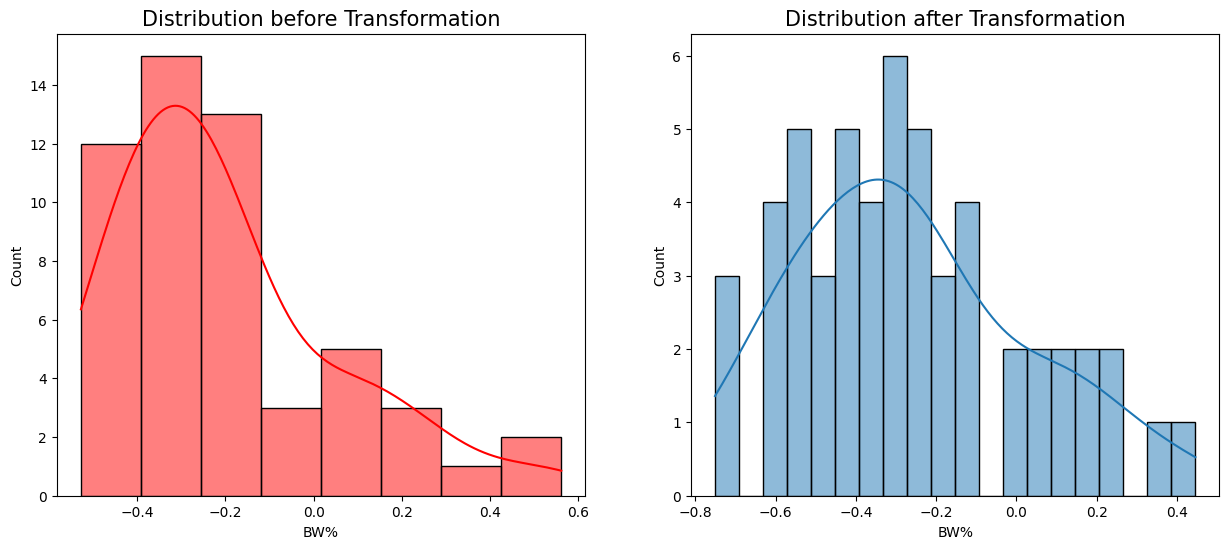

c:\Users\agata\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


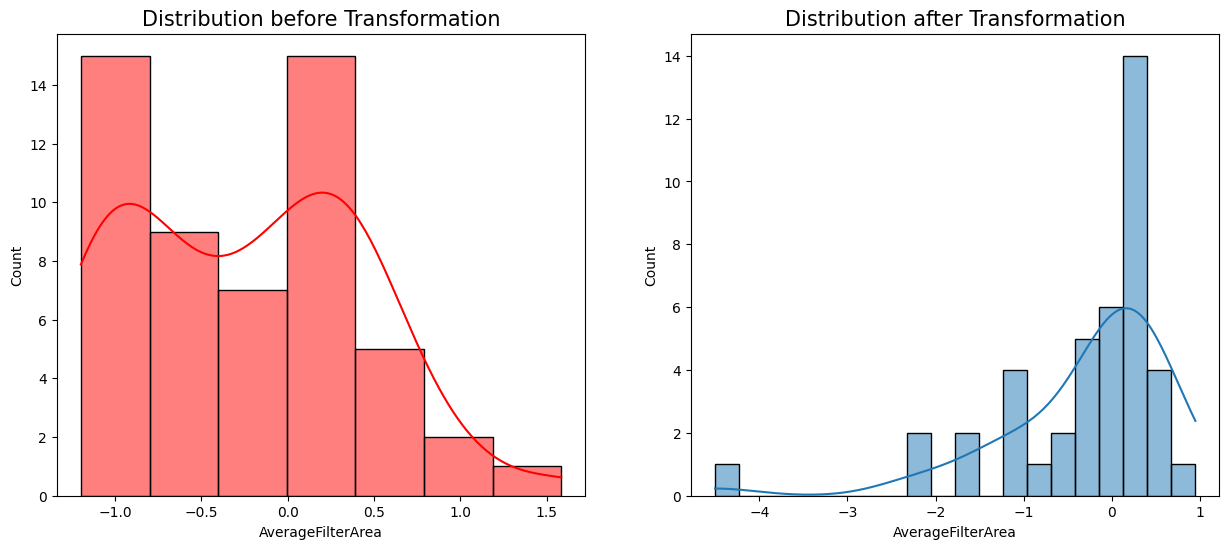

c:\Users\agata\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


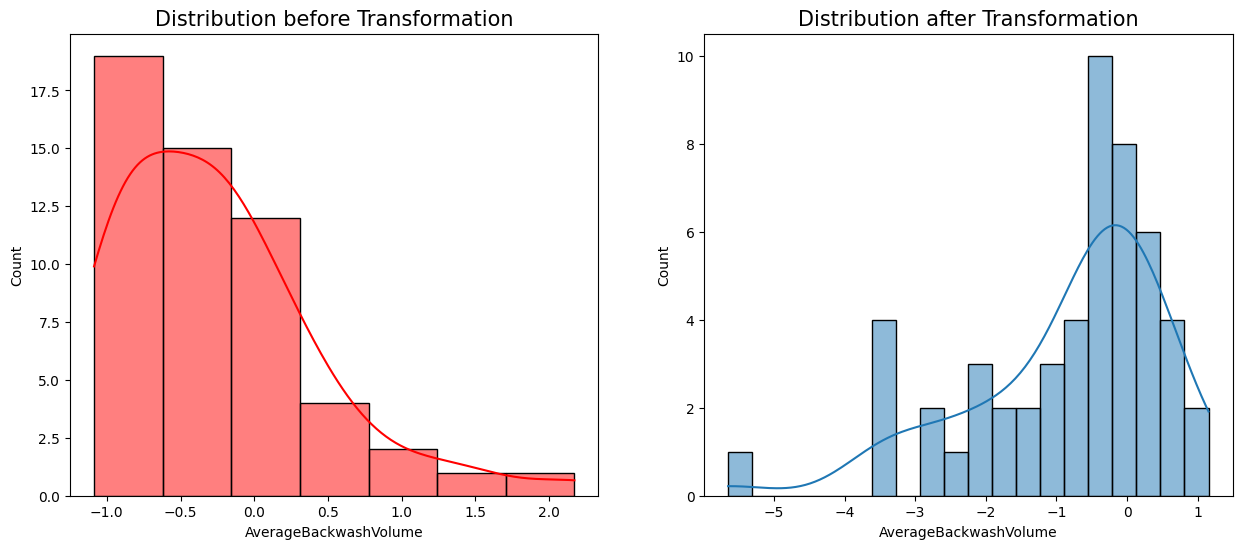

c:\Users\agata\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


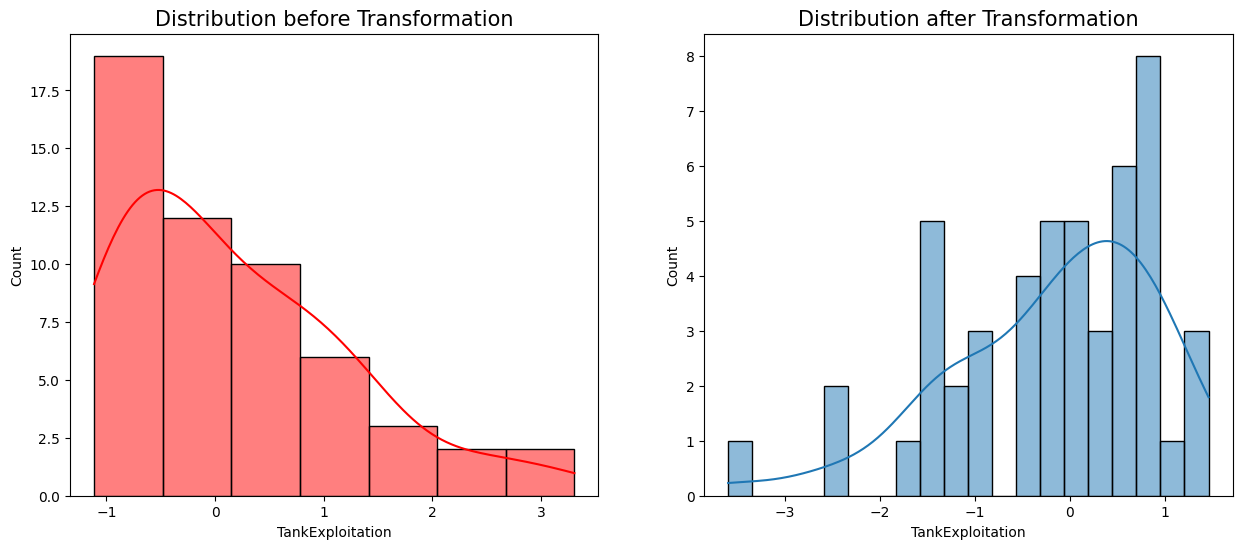

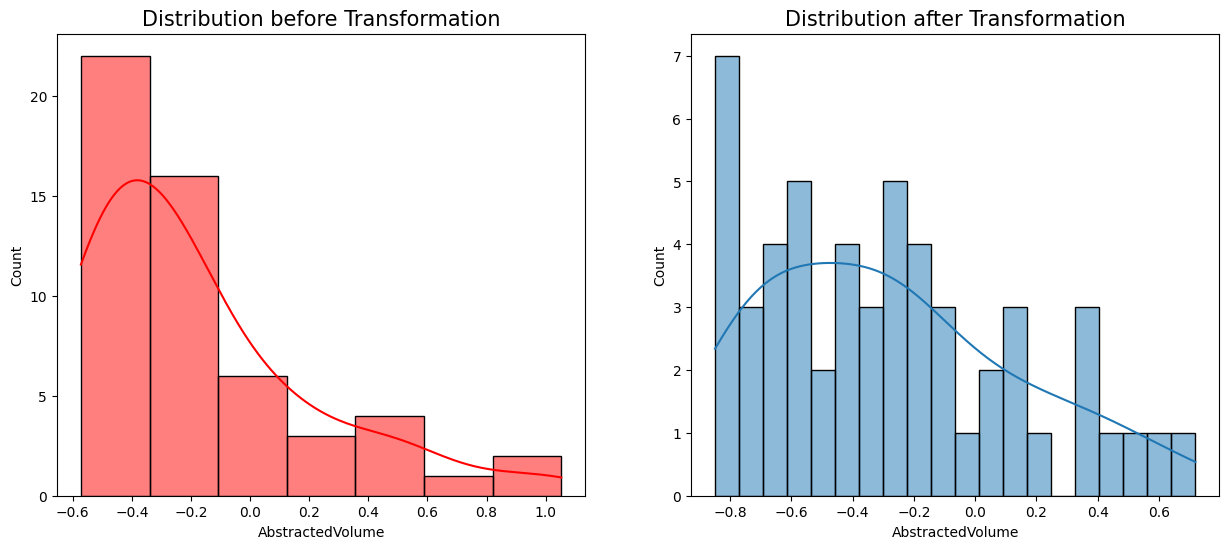

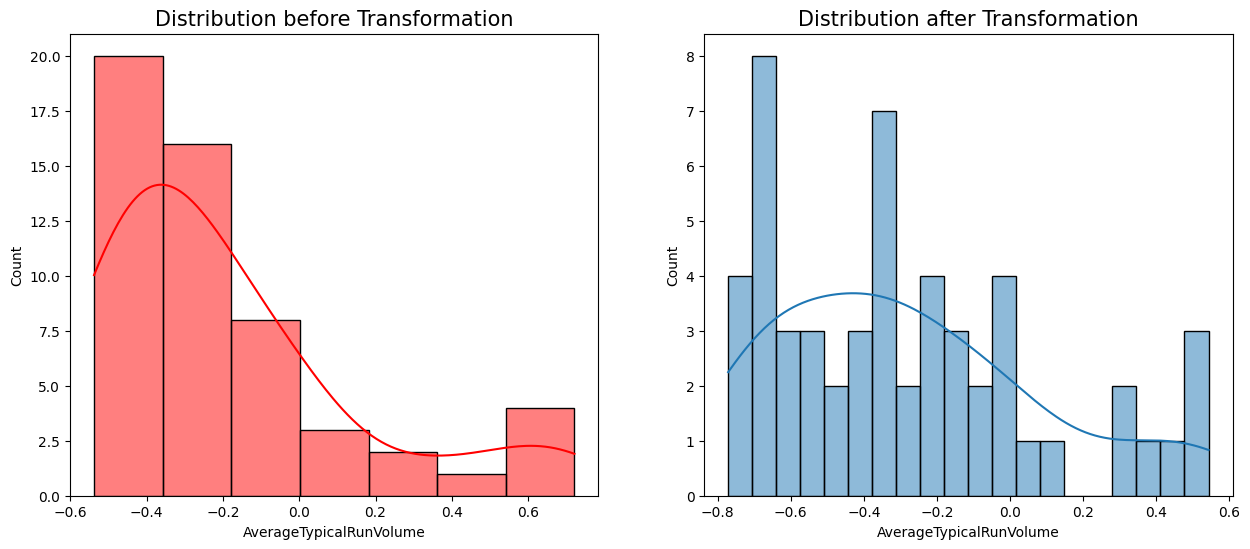

In [19]:
# # Example for a log transformation
# # Ensure that there are no non-positive values in the column
# df['feature'] = np.log1p(df['feature'])


from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

features_to_logTransform = ['Footprint', 'TankCapacity', 'TotalFilters', 'UFRV', 'BW%' , 'AverageFilterArea']

features_to_sqrtTransform = ['AverageBackwashVolume', 'TankExploitation', 'AbstractedVolume', 'AverageTypicalRunVolume']

def logTrans(feature):
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_log = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()

for feature in features_to_logTransform:    
    logTrans(feature)

def sqrtTrans(feature):
    
    sqrtTr = ColumnTransformer(transformers=[("sqrt", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_sqrt = pd.DataFrame(sqrtTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_sqrt,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
for feature in features_to_sqrtTransform:    
    sqrtTrans(feature)